**1- The data file contains numerical attributes that describe a letter and its corresponding class. Read the datafile “letterCG.data” and set all the numerical attributes as features.Split the data in to train and test sets.**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import datetime as dt #work with date type

#Visualisation frameworks
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns

from sklearn.model_selection import train_test_split # Split

In [2]:
#Loading our df
df = pd.read_csv('C:/Users/gabri/Desktop/Data Science/Python/Python for Data Science - Edureka/Module 14 - Model Selection and Boosting/letterCG.bin',
                sep=' ')

#Printing first five rows and shape
print(df.shape)
df.head()

(1509, 19)


,Class,x-box,y-box,width,high,Unnamed: 5,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,Unnamed: 18
0,C,4,10,5,8,2,5,7,7,10,7,6,13,1,8,4,9,NaN,NaN
1,C,3,5,4,4,2,4,8,5,7,12,9,11,1,10,2,7,NaN,NaN
2,G,5,10,6,7,3,8,7,8,8,6,7,9,2,7,5,10,NaN,NaN
3,C,5,9,6,7,4,3,8,6,7,12,10,13,1,9,3,7,NaN,NaN
4,G,4,8,5,6,3,6,6,7,6,10,7,12,2,9,4,9,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509 entries, 0 to 1508
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Class        1509 non-null   object 
 1   x-box        1509 non-null   int64  
 2   y-box        1509 non-null   int64  
 3   width        1509 non-null   int64  
 4   high         1509 non-null   int64  
 5   Unnamed: 5   1509 non-null   int64  
 6   onpix        1509 non-null   int64  
 7   x-bar        1509 non-null   int64  
 8   y-bar        1509 non-null   int64  
 9   x2bar        1509 non-null   int64  
 10  y2bar        1509 non-null   int64  
 11  xybar        1509 non-null   int64  
 12  x2ybr        1509 non-null   int64  
 13  xy2br        1509 non-null   int64  
 14  x-ege        1509 non-null   int64  
 15  xegvy        1509 non-null   int64  
 16  y-ege        1509 non-null   int64  
 17  yegvx        0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
dtypes: flo

In [4]:
df.isna().sum()

Class             0
x-box             0
y-box             0
width             0
high              0
Unnamed: 5        0
onpix             0
x-bar             0
y-bar             0
x2bar             0
y2bar             0
xybar             0
x2ybr             0
xy2br             0
x-ege             0
xegvy             0
y-ege             0
yegvx          1509
Unnamed: 18    1509
dtype: int64

In [5]:
#Since the last two columns doesn't have values, let's drop them
df = df.drop(['yegvx', 'Unnamed: 18'], axis=1)
df.head()

,Class,x-box,y-box,width,high,Unnamed: 5,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege
0,C,4,10,5,8,2,5,7,7,10,7,6,13,1,8,4,9
1,C,3,5,4,4,2,4,8,5,7,12,9,11,1,10,2,7
2,G,5,10,6,7,3,8,7,8,8,6,7,9,2,7,5,10
3,C,5,9,6,7,4,3,8,6,7,12,10,13,1,9,3,7
4,G,4,8,5,6,3,6,6,7,6,10,7,12,2,9,4,9


In [6]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

features = df.select_dtypes(include=numerics)
features.head()

,x-box,y-box,width,high,Unnamed: 5,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege
0,4,10,5,8,2,5,7,7,10,7,6,13,1,8,4,9
1,3,5,4,4,2,4,8,5,7,12,9,11,1,10,2,7
2,5,10,6,7,3,8,7,8,8,6,7,9,2,7,5,10
3,5,9,6,7,4,3,8,6,7,12,10,13,1,9,3,7
4,4,8,5,6,3,6,6,7,6,10,7,12,2,9,4,9


In [7]:
target = df['Class']

target.head()

0    C
1    C
2    G
3    C
4    G
Name: Class, dtype: object

In [8]:
target.unique()

array(['C', 'G'], dtype=object)

In [9]:
target = target.str.replace('C', '1')
target = target.str.replace('G', '0')
target.unique()

array(['1', '0'], dtype=object)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=0)

**2- Fit a sequence of AdaBoostClassifier with varying number of weak learners ranging from 1 to 16, keeping the max_depth as 1. Plot the accuracy on test set against the number of weak learners.Use decision tree classifier as the base classifier.**

In [15]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection

In [18]:
#seeting 5-fold cross-validation
kf = model_selection.KFold(n_splits=5)
dict_results = {}

for i in range(1,17):
    
    #Our model with i n_estimators
    ada = AdaBoostClassifier(n_estimators=i,base_estimator=None, random_state=0).fit(X_train,y_train)
    
    #Cross_val
    ada_results = model_selection.cross_val_score(ada, X_test, y_test, cv=kf)
    
    #Saving results
    score = ada_results.mean()
    dict_results[i] = score
    
dict_results

{1: 0.754993894993895,
 2: 0.7814163614163614,
 3: 0.7968742368742369,
 4: 0.821074481074481,
 5: 0.8499389499389499,
 6: 0.8697191697191696,
 7: 0.8652991452991454,
 8: 0.8918192918192919,
 9: 0.8806593406593407,
 10: 0.8895238095238096,
 11: 0.893992673992674,
 12: 0.894065934065934,
 13: 0.905079365079365,
 14: 0.8918925518925519,
 15: 0.8961416361416361,
 16: 0.9028327228327229}

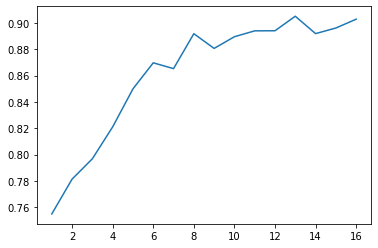

In [21]:
keys = dict_results.keys()
values = dict_results.values()

plt.plot(keys, values)